<a href="https://colab.research.google.com/github/MickGuillen/precioscarburantes/blob/main/Guillen_Perez_Alan_Michel_Act1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import pandas as pd

url = "https://raw.githubusercontent.com/MickGuillen/precioscarburantes/main/isc31_%20act1_precios_carburantes_24.csv"

tabla = pd.read_csv(url)

print(f"Datos cargados: {tabla.shape[0]} filas y {tabla.shape[1]} columnas")

tabla.head()

Datos cargados: 11865 filas y 10 columnas


,Provincia,Municipio,Localidad,Código postal,Dirección,Precio gasolina 95 E5,Precio gasóleo A,Tipo venta,Tipo servicio,Rótulo
0,ALBACETE,ABENGIBRE,ABENGIBRE,2250,"AVENIDA CASTILLA LA MANCHA, 26","1,529","1,419",P,A,Nº 10.935
1,ALBACETE,ALBACETE,ALBACETE,2001,"CALLE FEDERICO GARCIA LORCA, 5",NaN,"1,560",R,A,CEPSA
2,ALBACETE,ALBACETE,ALBACETE,2001,"CALLE FEDERICO GARCIA LORCA, 1","1,409","1,399",P,D,PLENOIL
3,ALBACETE,ALBACETE,ALBACETE,2001,"AVENIDA 1º DE MAYO, S/N","1,539","1,489",P,A,CARREFOUR
4,ALBACETE,ALBACETE,ALBACETE,2001,"CALLE PRINCIPE DE ASTURIAS (POLÍGONO DE ROMICA), 5","1,549","1,549",P,A,BP ROMICA


In [110]:
import sys
!{sys.executable} -m pip install autoviz

In [111]:
import pandas as pd

url = "https://raw.githubusercontent.com/MickGuillen/precioscarburantes/main/isc31_%20act1_precios_carburantes_24.csv"

madrid = pd.read_csv(url)

In [112]:
print("Información general del DataFrame\n")

print(f"Número de filas: {madrid.shape[0]}")
print(f"Número de columnas: {madrid.shape[1]}\n")

print("Tipos de datos:")
print(madrid.dtypes, "\n")

print("Valores no nulos por columna:")
print(madrid.notnull().sum())


Información general del DataFrame

Número de filas: 11865
Número de columnas: 10

Tipos de datos:
Provincia                object
Municipio                object
Localidad                object
Código postal             int64
Dirección                object
Precio gasolina 95 E5    object
Precio gasóleo A         object
Tipo venta               object
Tipo servicio            object
Rótulo                   object
dtype: object 

Valores no nulos por columna:
Provincia                11865
Municipio                11865
Localidad                11865
Código postal            11865
Dirección                11865
Precio gasolina 95 E5    10702
Precio gasóleo A         11498
Tipo venta               11865
Tipo servicio            10803
Rótulo                   11865
dtype: int64


In [113]:
import pandas as pd

url = "https://raw.githubusercontent.com/MickGuillen/precioscarburantes/main/isc31_%20act1_precios_carburantes_24.csv"

df = pd.read_csv(url)


In [114]:
numericas = df.select_dtypes(include='number')

resumen = pd.DataFrame({
    "count": numericas.count(),
    "mean": numericas.mean(),
    "std": numericas.std(),
    "min": numericas.min(),
    "25%": numericas.quantile(0.25),
    "50%": numericas.median(),
    "75%": numericas.quantile(0.75),
    "max": numericas.max()
})

resumen


,count,mean,std,min,25%,50%,75%,max
Código postal,11865,25413.898272,14476.124512,1002,12006.0,27246.0,38002.0,52006


In [115]:
nulos_por_columna = df.apply(lambda col: col.isna().sum())
nulos_por_columna

,0
Provincia,0
Municipio,0
Localidad,0
Código postal,0
Dirección,0
Precio gasolina 95 E5,1163
Precio gasóleo A,367
Tipo venta,0
Tipo servicio,1062
Rótulo,0


In [116]:

precios = ["Precio gasolina 95 E5", "Precio gasóleo A"]

df[precios] = df[precios].apply(
    lambda c: pd.to_numeric(c.str.replace(",", "."), errors="coerce")
)

In [117]:
df.loc[:, precios].iloc[:5]

,Precio gasolina 95 E5,Precio gasóleo A
0,1.529,1.419
1,NaN,1.560
2,1.409,1.399
3,1.539,1.489
4,1.549,1.549


In [118]:
df = df[df.notnull().all(axis=1)]

In [119]:
df.isna().any().astype(int)

,0
Provincia,0
Municipio,0
Localidad,0
Código postal,0
Dirección,0
Precio gasolina 95 E5,0
Precio gasóleo A,0
Tipo venta,0
Tipo servicio,0
Rótulo,0


In [120]:
df["Provincia"].drop_duplicates().values

array(['ALBACETE', 'ALICANTE', 'ALMERÍA', 'ARABA/ÁLAVA', 'ASTURIAS',
       'ÁVILA', 'BADAJOZ', 'BALEARS (ILLES)', 'BARCELONA', 'BIZKAIA',
       'BURGOS', 'CÁCERES', 'CÁDIZ', 'CANTABRIA', 'CASTELLÓN / CASTELLÓ',
       'CEUTA', 'CIUDAD REAL', 'CÓRDOBA', 'CORUÑA (A)', 'CUENCA',
       'GIPUZKOA', 'GIRONA', 'GRANADA', 'GUADALAJARA', 'HUELVA', 'HUESCA',
       'JAÉN', 'LEÓN', 'LLEIDA', 'LUGO', 'MADRID', 'MÁLAGA', 'MELILLA',
       'MURCIA', 'NAVARRA', 'OURENSE', 'PALENCIA', 'PALMAS (LAS)',
       'PONTEVEDRA', 'RIOJA (LA)', 'SALAMANCA', 'SANTA CRUZ DE TENERIFE',
       'SEGOVIA', 'SEVILLA', 'SORIA', 'TARRAGONA', 'TERUEL', 'TOLEDO',
       'VALENCIA / VALÈNCIA', 'VALLADOLID', 'ZAMORA', 'ZARAGOZA'],
      dtype=object)

In [121]:
madrid = df.query("Provincia == 'MADRID'")

In [122]:
print("Filas:", len(madrid))
print("Columnas:", len(madrid.columns))

Filas: 762
Columnas: 10


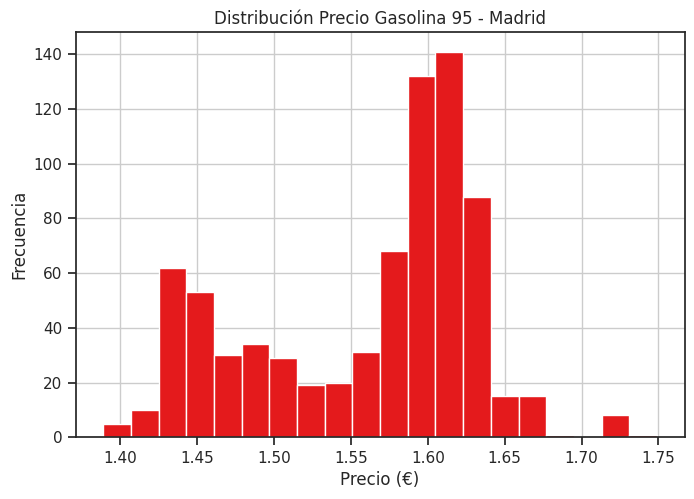

In [123]:
plt.figure(figsize=(7,5))

datos = madrid["Precio gasolina 95 E5"].dropna()

plt.hist(datos, bins=20)

plt.title("Distribución Precio Gasolina 95 - Madrid")
plt.xlabel("Precio (€)")
plt.ylabel("Frecuencia")
plt.grid(True)

plt.show()



In [124]:
import matplotlib
matplotlib.use('Agg')

In [125]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

AV.AutoViz(
    filename="",
    dfte=df,
    depVar="",
    verbose=2,
    save_plot_dir="/content/autoviz"
)

Shape of your Data Set loaded: (9655, 10)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
  Printing up to 30 columns (max) in each category:
    Numeric Columns : ['Precio gasolina 95 E5', 'Precio gasóleo A']
    Integer-Categorical Columns: ['Código postal']
    String-Categorical Columns: ['Tipo venta', 'Tipo servicio', 'Provincia']
    Factor-Categorical Columns: []
    String-Boolean Columns: []
    Numeric-Boolean Columns: []
    Discrete String Columns: []
    NLP text Columns: ['Dirección', 'Municipio', 'Localidad', 'Rótulo']
    Date Time Columns: []
    ID Columns: []
    Columns that will not be considered in modeling: []
    10 Predictors classified...
        No variables removed since no ID or low-information variables foun

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Provincia,object,0.000000,0,,,13 rare categories: Too many to list. Group them into a single category or drop the categories.
Municipio,object,0.000000,31,,,No issue
Localidad,object,0.000000,38,,,No issue
Código postal,int64,0.000000,41,1002.000000,52006.000000,No issue
Dirección,object,0.000000,98,,,No issue
Precio gasolina 95 E5,float64,0.000000,NA,1.037000,2.299000,Column has 259 outliers greater than upper bound (1.79) or lower than lower bound(1.27). Cap them or remove them.
Precio gasóleo A,float64,0.000000,NA,1.037000,2.259000,"Column has 32 outliers greater than upper bound (1.82) or lower than lower bound(1.14). Cap them or remove them., Column has a high correlation with ['Precio gasolina 95 E5']. Consider dropping one of them."
Tipo venta,object,0.000000,0,,,1 rare categories: ['p']. Group them into a single category or drop the categories.
Tipo servicio,object,0.000000,0,,,No issue
Rótulo,object,0.000000,31,,,No issue


Number of All Scatter Plots = 3


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

Could not draw wordcloud plot for Dirección. 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.

Could not draw wordcloud plot for Municipio. 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.

Could not draw wordcloud plot for Localidad. 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: h

,Provincia,Municipio,Localidad,Código postal,Dirección,Precio gasolina 95 E5,Precio gasóleo A,Tipo venta,Tipo servicio,Rótulo
0,ALBACETE,ABENGIBRE,ABENGIBRE,2250,"AVENIDA CASTILLA LA MANCHA, 26",1.529,1.419,P,A,Nº 10.935
2,ALBACETE,ALBACETE,ALBACETE,2001,"CALLE FEDERICO GARCIA LORCA, 1",1.409,1.399,P,D,PLENOIL
3,ALBACETE,ALBACETE,ALBACETE,2001,"AVENIDA 1º DE MAYO, S/N",1.539,1.489,P,A,CARREFOUR
4,ALBACETE,ALBACETE,ALBACETE,2001,"CALLE PRINCIPE DE ASTURIAS (POLÍGONO DE ROMICA), 5",1.549,1.549,P,A,BP ROMICA
5,ALBACETE,ALBACETE,ALBACETE,2005,"AVENIDA MENÉNDEZ PIDAL, 58",1.569,1.529,P,A,TAMOS
...,...,...,...,...,...,...,...,...,...,...
11857,ZARAGOZA,ZARAGOZA,VILLARRAPA,50692,"AUTOVIA A-68 KM. 258,25",1.589,1.559,P,P,REPSOL
11861,ZARAGOZA,ZARAGOZA,ZARAGOZA,50197,"AVENIDA DIAGONAL PLAZA, 22",1.609,1.599,P,A,REPSOL
11862,ZARAGOZA,ZUERA,ZUERA,50800,"CARRETERA N-330A KM. 24,000",1.579,1.559,P,A,REPSOL
11863,ZARAGOZA,ZUERA,ZUERA,50800,"CALLE AUSTRIA, 11,17",1.505,1.425,P,A,AN ENERGETICOS - ZUERA


In [126]:
resumen_precios = madrid.loc[:, ["Precio gasolina 95 E5", "Precio gasóleo A"]].describe()
resumen_precios

,Precio gasolina 95 E5,Precio gasóleo A
count,762.000000,762.000000
mean,1.560177,1.504937
std,0.074100,0.102195
min,1.389000,1.249000
25%,1.489000,1.411500
50%,1.589000,1.559000
75%,1.615000,1.579000
max,1.749000,1.709000


In [127]:
madrid[["Precio gasolina 95 E5", "Precio gasóleo A"]].corr()

,Precio gasolina 95 E5,Precio gasóleo A
Precio gasolina 95 E5,1.000000,0.932124
Precio gasóleo A,0.932124,1.000000


In [128]:
print(url)

https://raw.githubusercontent.com/MickGuillen/precioscarburantes/main/isc31_%20act1_precios_carburantes_24.csv


In [129]:
%matplotlib inline

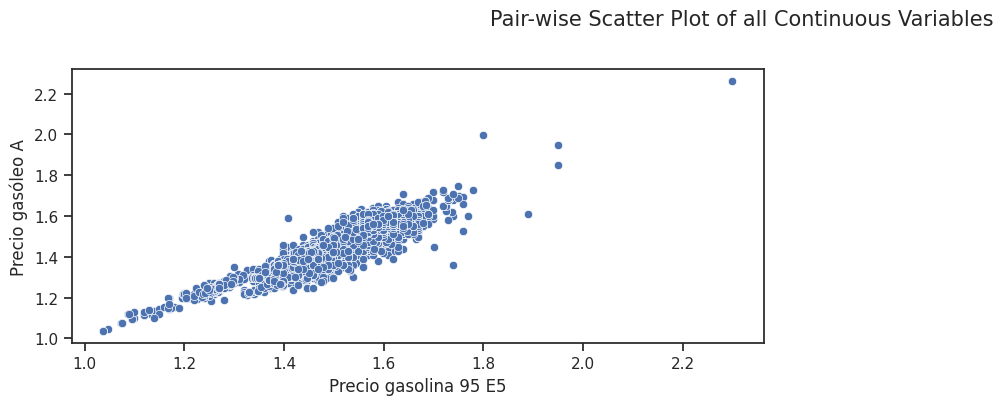

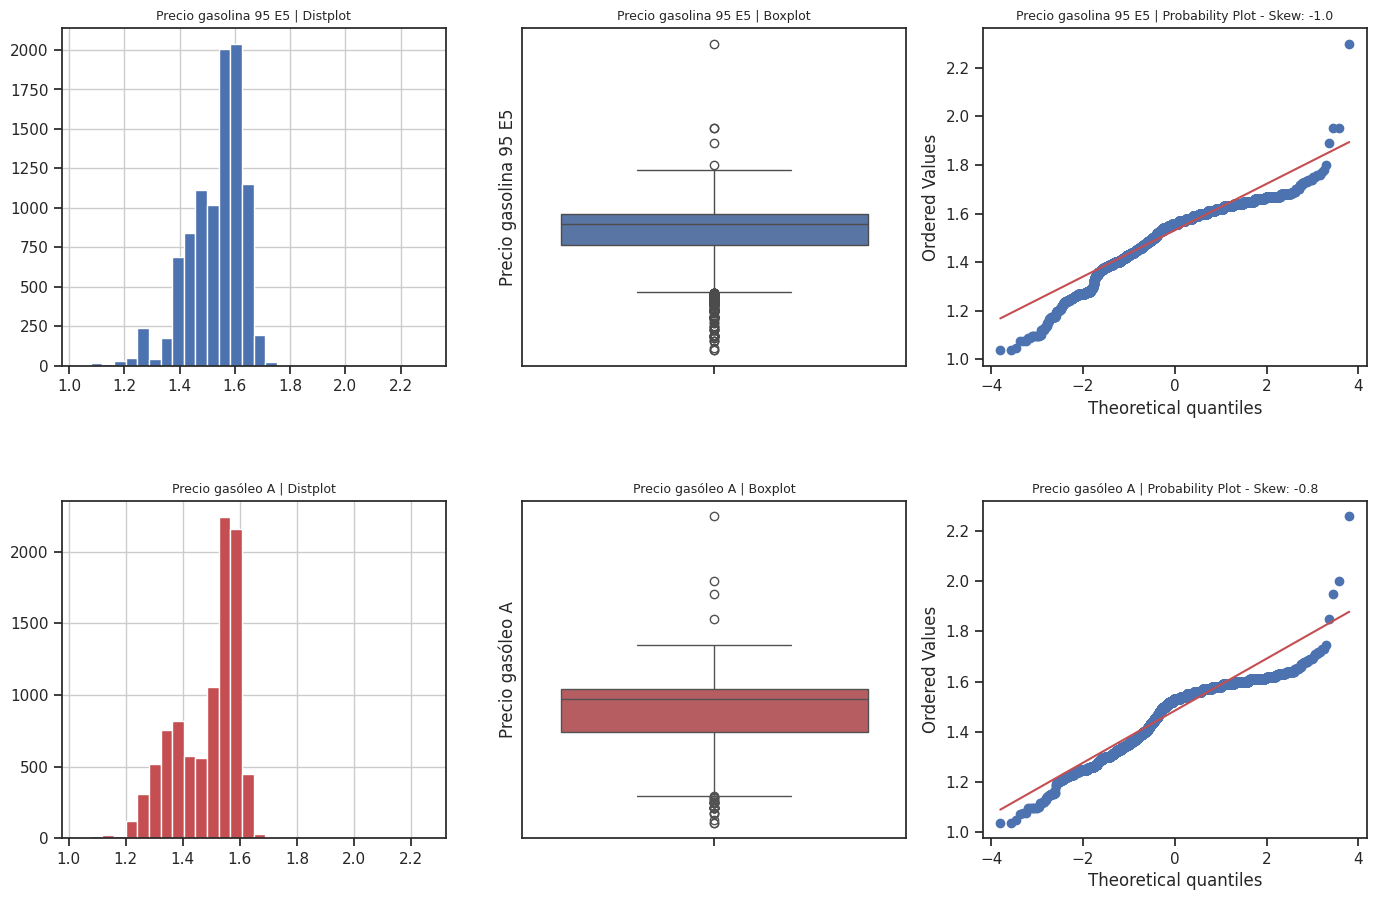

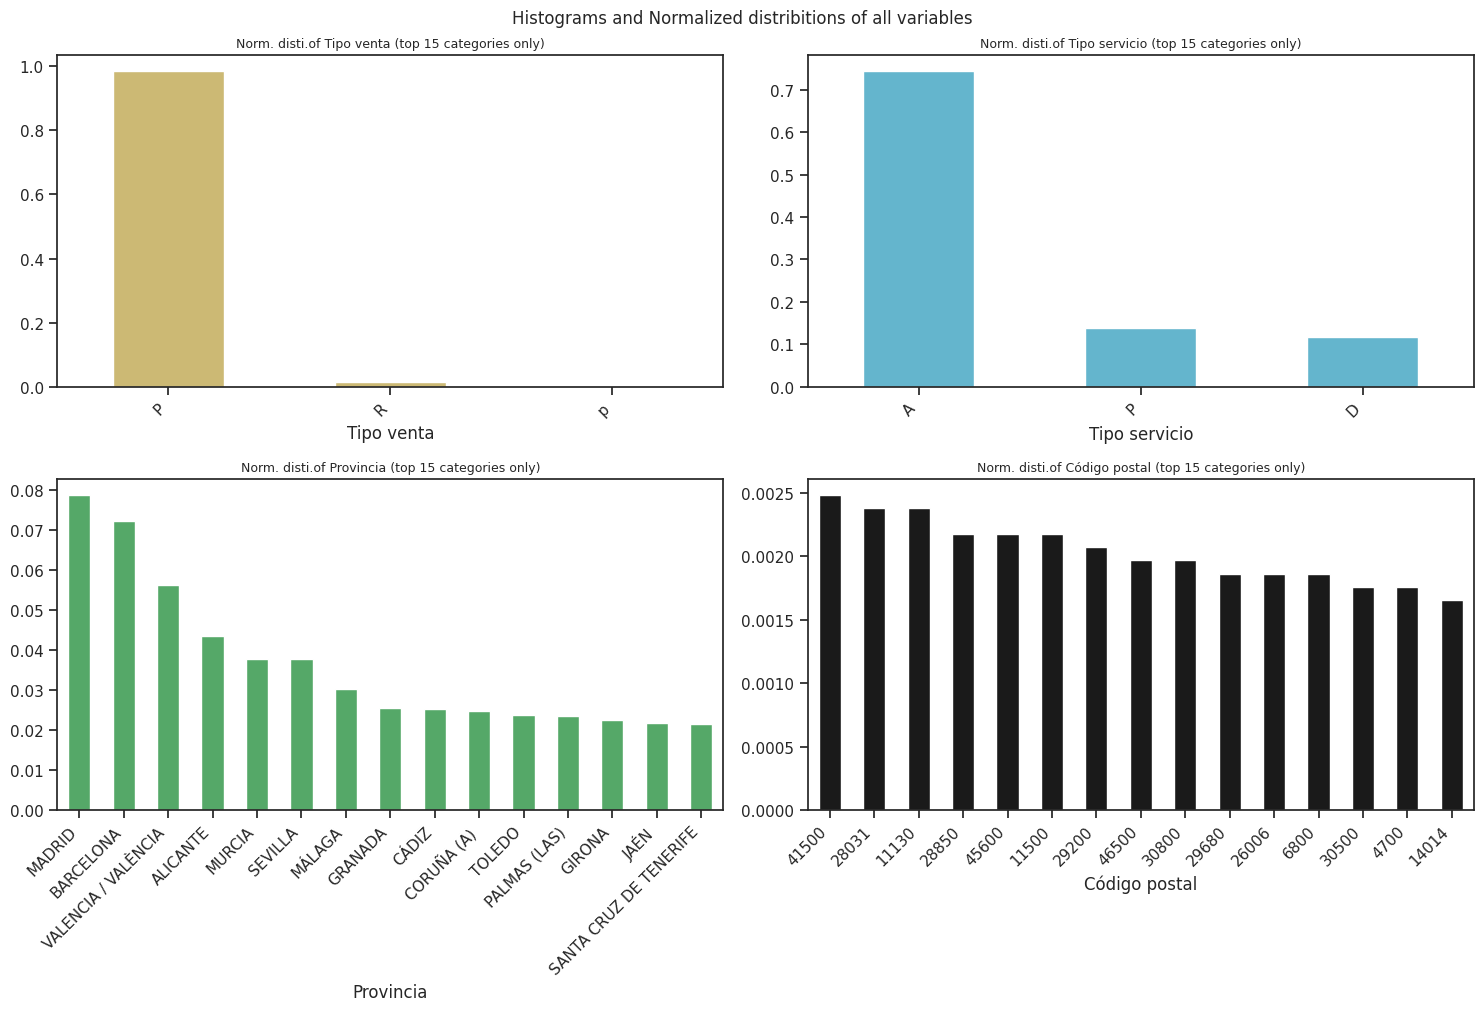

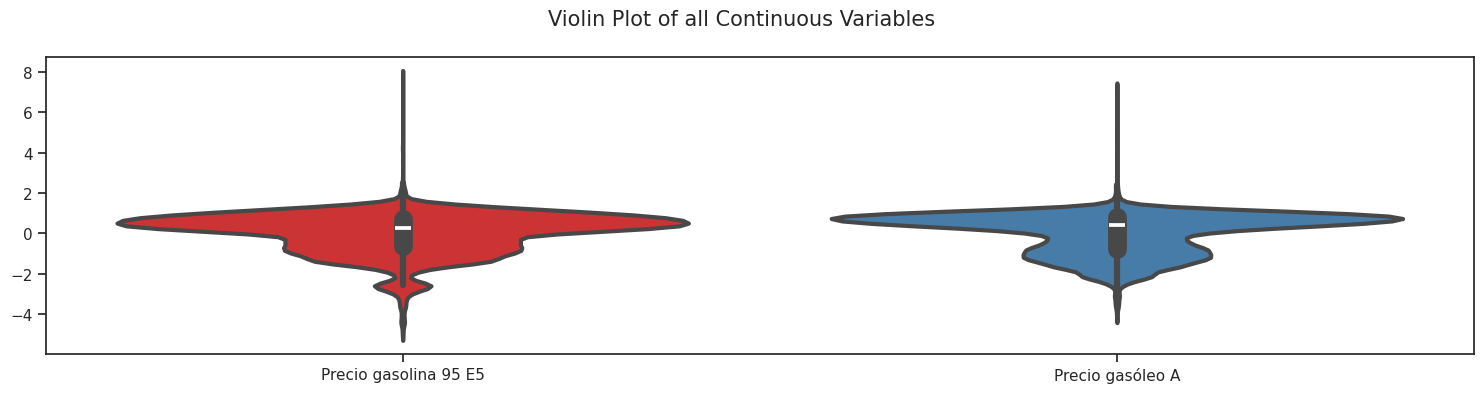

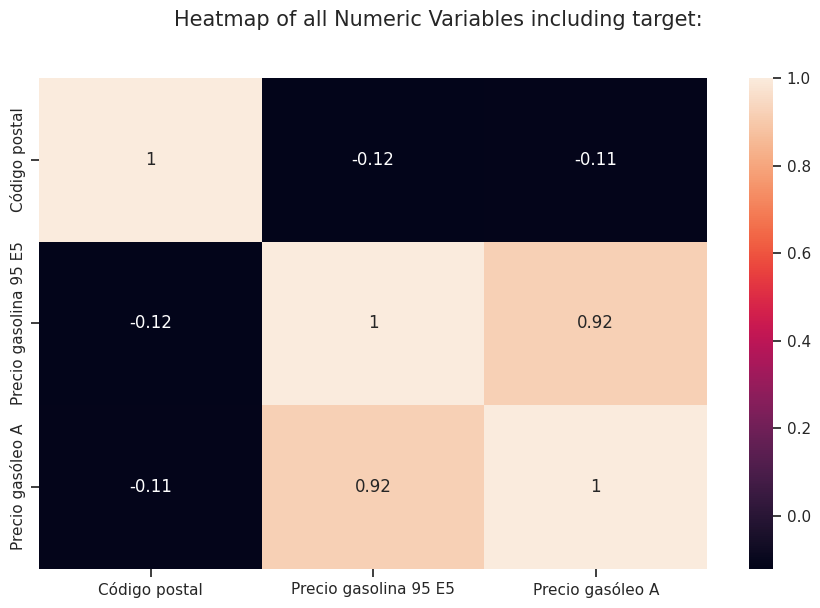

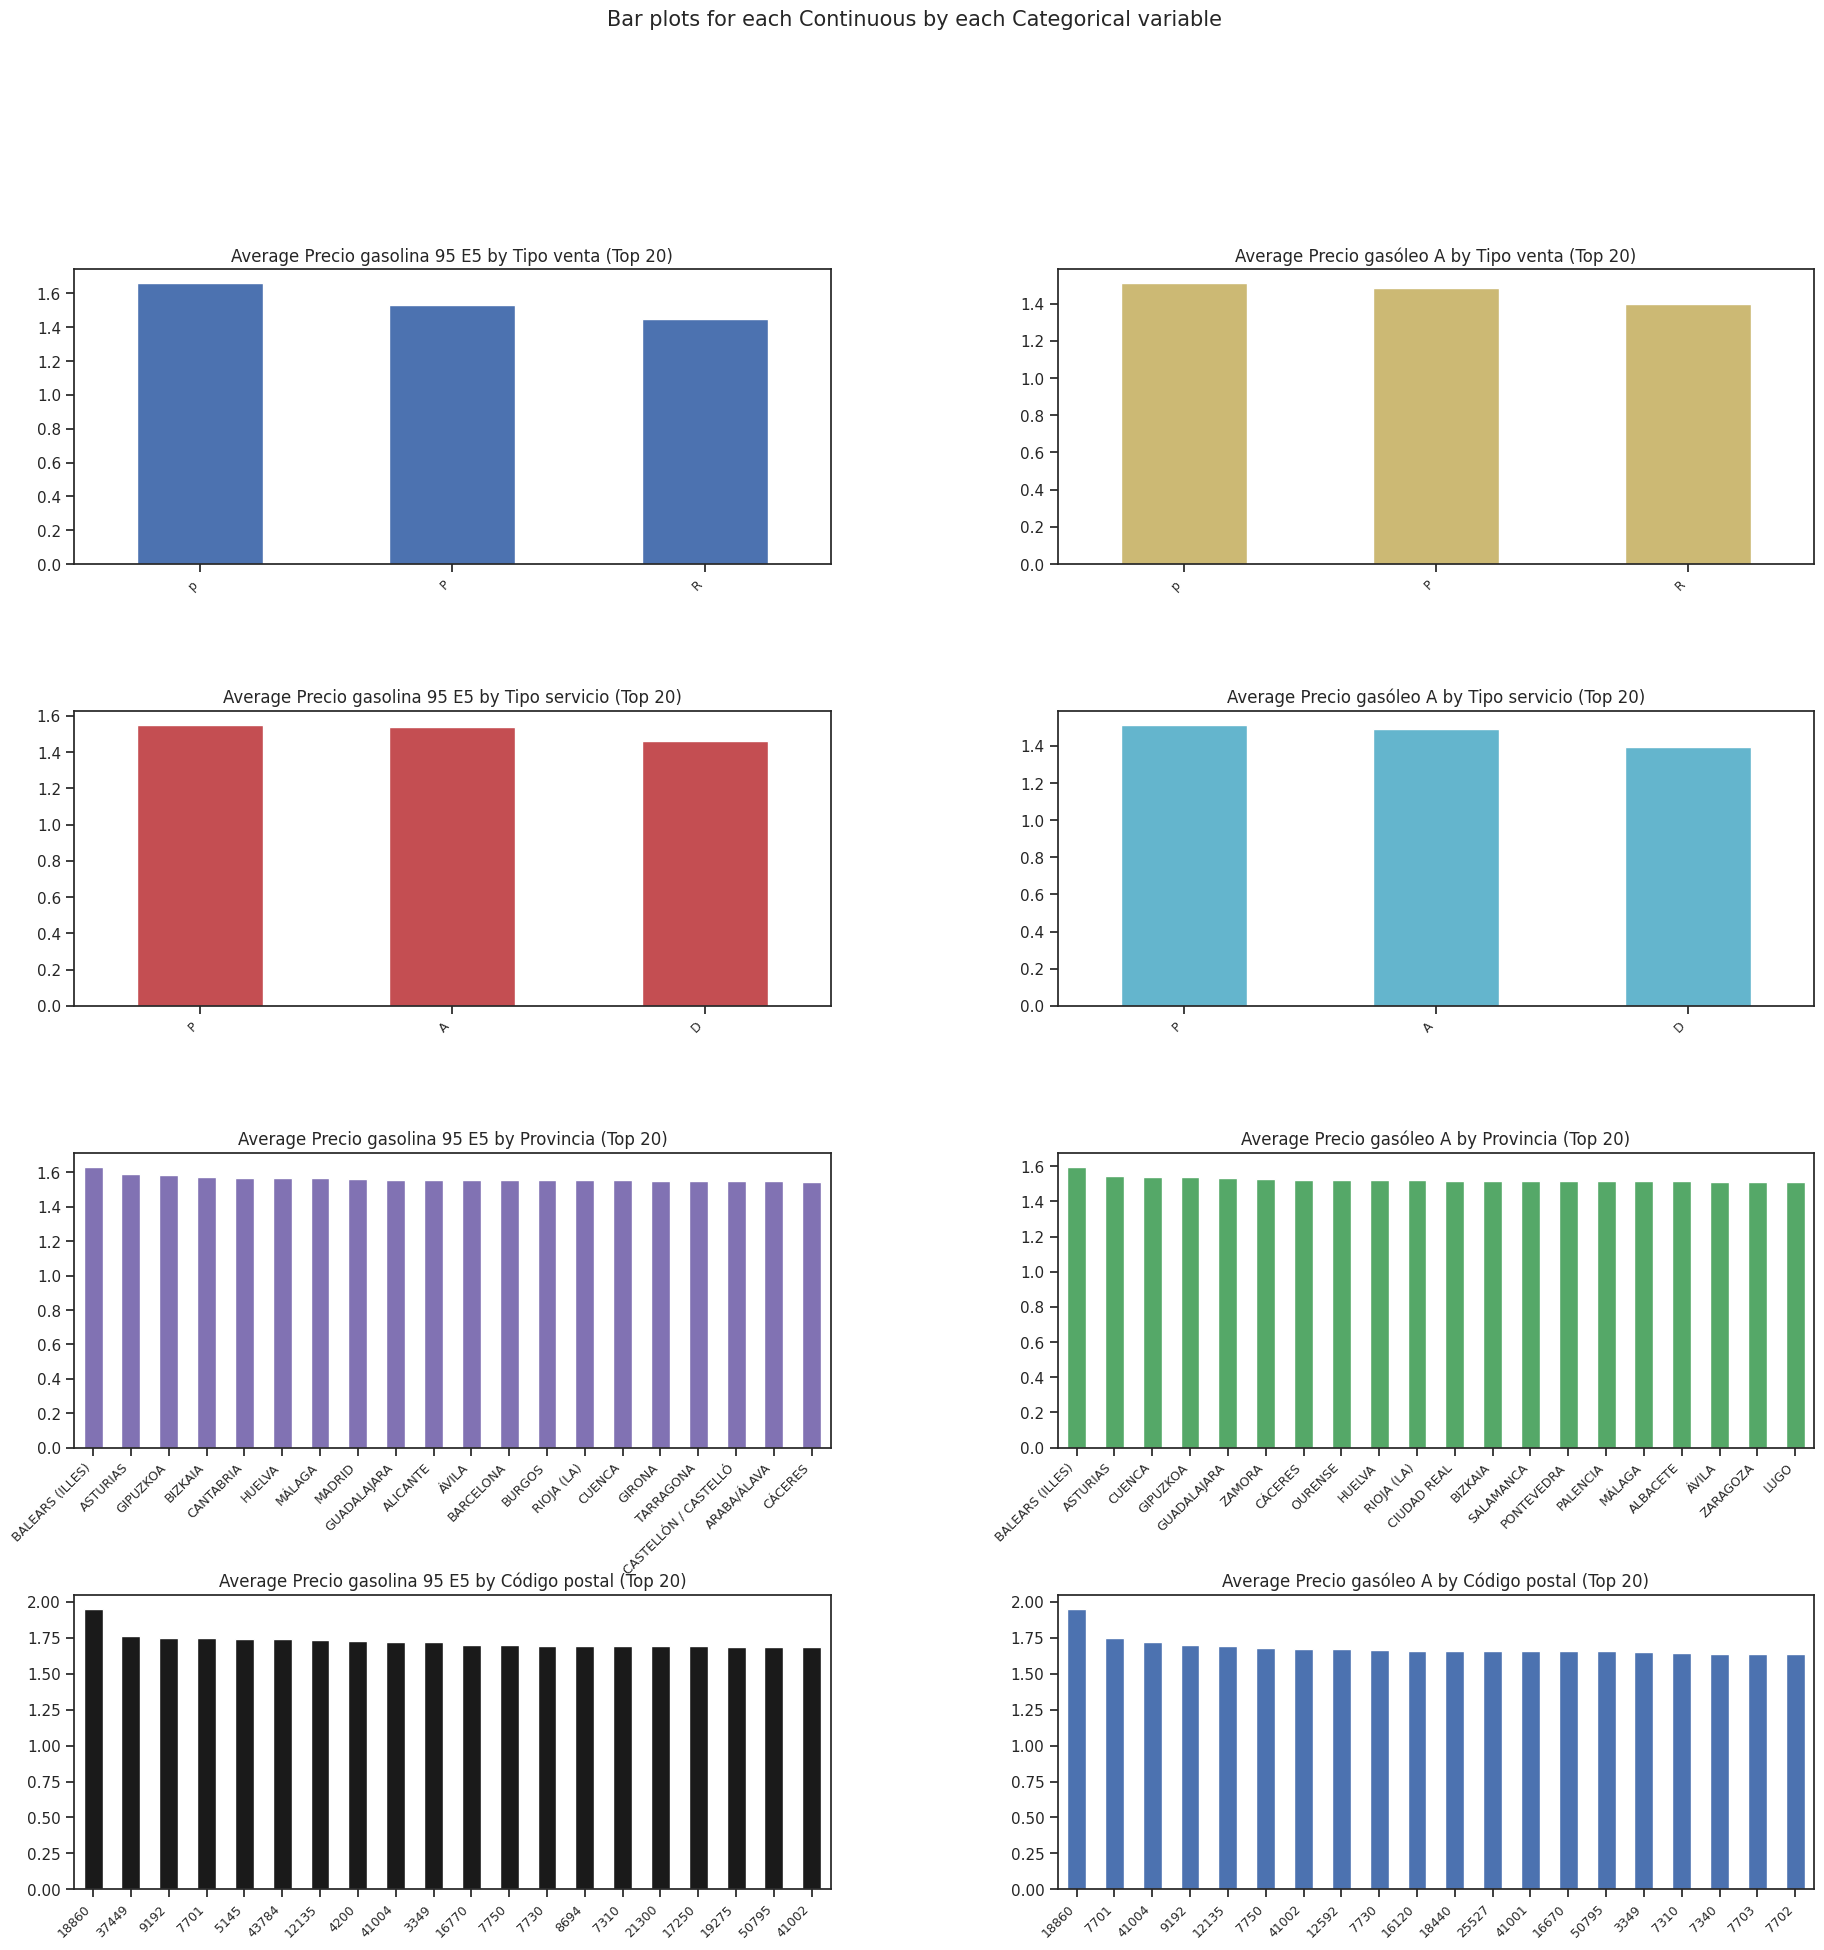

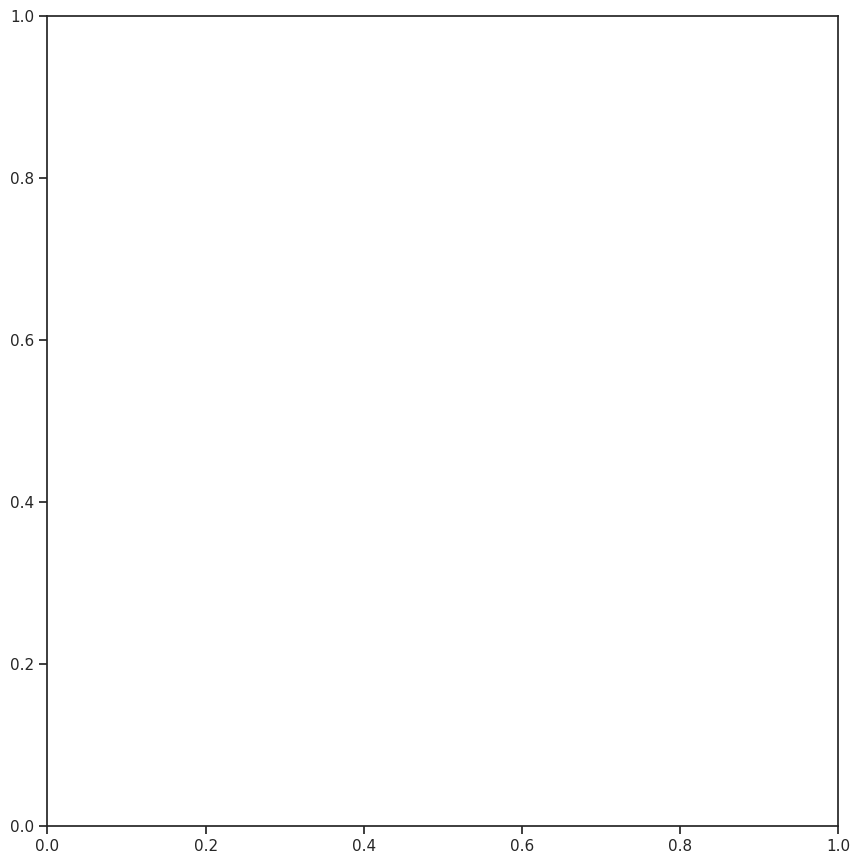

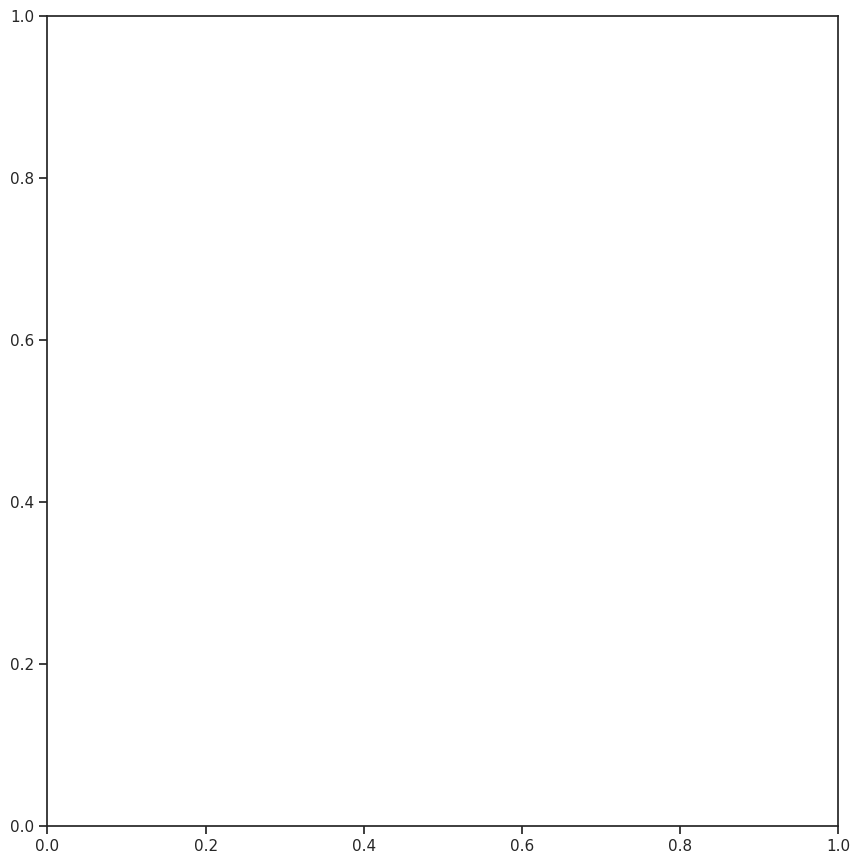

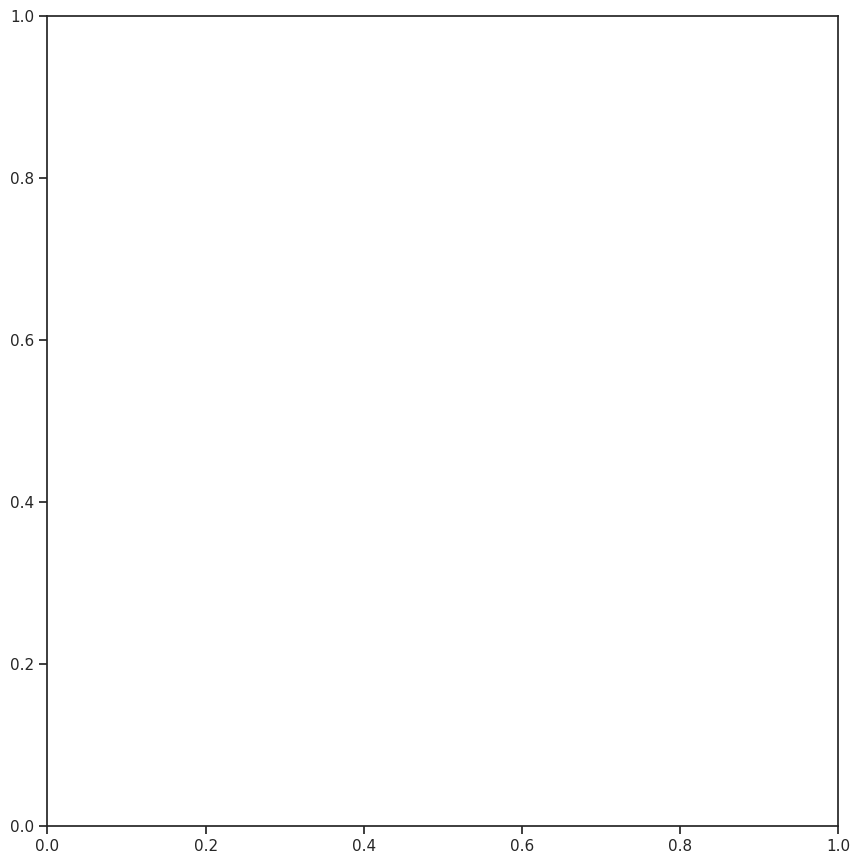

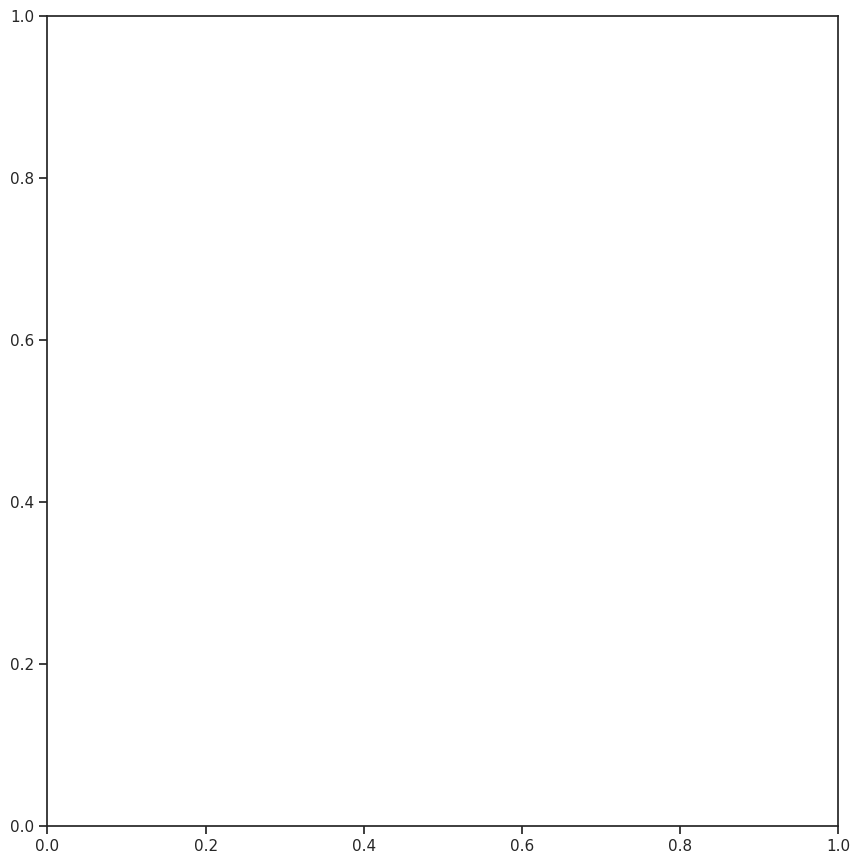

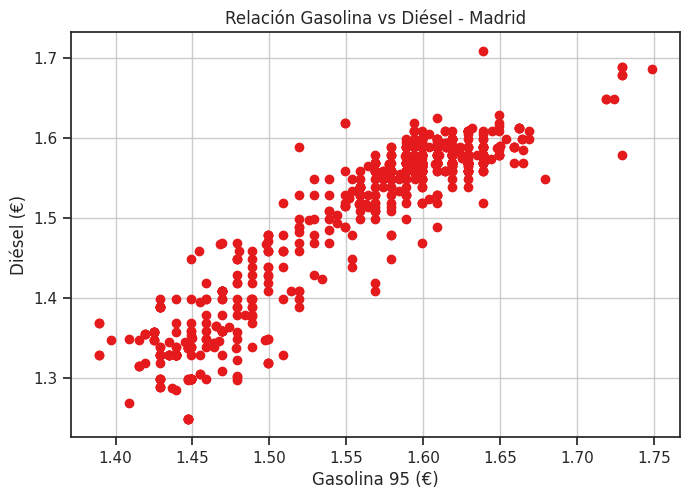

In [130]:
plt.figure(figsize=(7,5))

plt.scatter(
    madrid["Precio gasolina 95 E5"],
    madrid["Precio gasóleo A"]
)

plt.title("Relación Gasolina vs Diésel - Madrid")
plt.xlabel("Gasolina 95 (€)")
plt.ylabel("Diésel (€)")

plt.grid(True)
plt.show()
plt.show()